In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ocean import *

In [2]:
simulator(Simulator.spectre)

<Simulator.spectre: Symbol('spectre')>

In [3]:
design('Zeno', 'DynamicAmplifierTest', 'schematic')

(Symbol('Zeno'), Symbol('DynamicAmplifierTest'), Symbol('schematic'))

In [4]:
model_file(('$UCDPRJDIR/corners.scs', 'top_tt'))

[('$UCDPRJDIR/corners.scs', 'top_tt')]

In [5]:
# Define design variables
vars = {}

# - Supply voltage [V]
vars['vdd'] = 900e-3
# - Differential mode input voltage [V]
vars['vid'] = 10e-3
# - Common mode input voltage [V]
vars['vic'] = 450e-3
# - Positive input voltage [V]
vars['vip'] = vars['vic'] + vars['vid'] / 2
# - Negative input voltage [V]
vars['vin'] = vars['vic'] - vars['vid'] / 2
# Sampling frequency [Hz]
vars['fs'] = 12.8e9
# Load capacitance [F]
vars['cl'] = 10e-15

des_var(vars)

'1e-14'

In [6]:
save(SaveType.v, ['/vop', '/von'])

'/von'

In [7]:
analysis(AnalysisType.tran, stop = 1 / vars['fs'])

'7.8125e-11'

In [8]:
run()

'/srv/spectre07/cameysma/DynamicAmplifierTest/spectre/schematic'

In [9]:
select_result(AnalysisType.tran)

<remote stdobj@0x42aa4308>

In [10]:
vop = get_data('/vop')
von = get_data('/von')

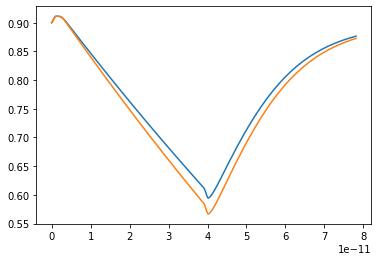

In [11]:
plt.plot(*vop.pull())
plt.plot(*von.pull())
plt.show()